### OLS Task01
#### 쇼핑 고객 데이터

- Customer ID: 고객 아이디
- Gender: 고객의 성별
- Age: 고객의 나이
- Annual Income: 고객의 연소득
- Spending Score: 고객 행동 및 지출 성격에 따라 상점에서 할당한 점수
- Profession: 직업, 전문직
- Work Experience: 고객의 근무 경력(연 단위)
- Family Size: 가족 구성원 수

#### Target
- Spending Score: 고객 별 소비 점수

In [1]:
import pandas as pd
import numpy as np

c_df = pd.read_csv('./datasets/customers.csv')

c_df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


#### 회귀 분석
- 수치형, 범주형 (제일 먼저 확인)
- 타겟 데이터 분포
- 상관관계 corr()
- OLS
- VIF
- One-Hot 인코딩 지양
- Label 인코딩 순서에 맞게 전처리
- (x1 * W1 + x2 * w2) * w_category = new_feature  
  상관성이 있는 데이터끼리 feature engineering (되면 할 것)

#### 범주형 데이터들
- Gender, Profession
> - 데이터프레임 복사 후, 복사본에서 제거
> - 복사본 전처리 끝나면 원본에서 가져와 붙이기

In [2]:
# 필요한 컬럼만 추리기
columns = ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size', 'Spending Score (1-100)']

# 필요한 컬럼들만 추린 새로운 데이터 세트(전처리용) 생성
pre_c_df = c_df.loc[:, columns]

pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,Spending Score (1-100)
0,19,15000,1,4,39
1,21,35000,3,3,81
2,20,86000,1,1,6
3,23,59000,0,2,77
4,31,38000,2,6,40
...,...,...,...,...,...
1995,71,184387,8,7,40
1996,91,73158,7,7,32
1997,87,90961,9,2,14
1998,77,182109,7,2,4


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income ($)'}>],
       [<Axes: title={'center': 'Work Experience'}>,
        <Axes: title={'center': 'Family Size'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

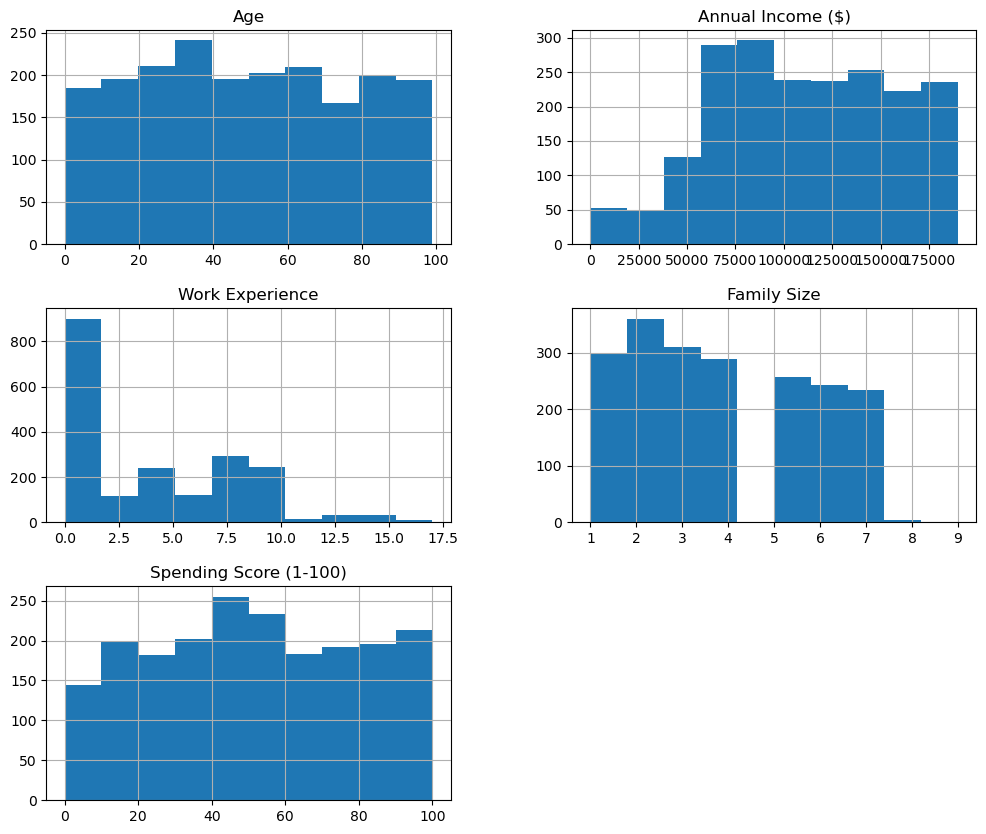

In [3]:
# 각 컬럼의 데이터 분포를 히스토그램으로 시각화
pre_c_df.hist(figsize=(12, 10))

#### 중간 분석
- Work Experience는 데이터 분포가 극단적이므로 제거
- 타겟 데이터(Spending Score)는 데이터 분포가 비교적 균일하니 이상치 제거를 하지 않고,  
  첨도 역시 높지 않으니 로그 처리도 따로 하지 않음

In [4]:
# Work Experience 컬럼 제거
pre_c_df = pre_c_df.drop(labels=['Work Experience'], axis=1)
pre_c_df

,Age,Annual Income ($),Family Size,Spending Score (1-100)
0,19,15000,4,39
1,21,35000,3,81
2,20,86000,1,6
3,23,59000,2,77
4,31,38000,6,40
...,...,...,...,...
1995,71,184387,7,40
1996,91,73158,7,32
1997,87,90961,2,14
1998,77,182109,2,4


In [5]:
# 타겟과의 상관관계 출력
pre_c_df.corr()['Spending Score (1-100)'].sort_values(ascending=False)[1:]

Annual Income ($)    0.023299
Family Size          0.002232
Age                 -0.041798
Name: Spending Score (1-100), dtype: float64

#### 중간 분석
- 타겟과의 상관관계 약함
- 일단 OLS 및 VIF 출력 후 전처리 다시 해보기

In [6]:
from statsmodels.api import OLS

# 데이터 분리
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

# 현재 데이터 세트의 OLS 평가 출력
model = OLS(targets, features)
print(model.fit().summary())

                                   OLS Regression Results                                  
Dep. Variable:     Spending Score (1-100)   R-squared (uncentered):                   0.706
Model:                                OLS   Adj. R-squared (uncentered):              0.706
Method:                     Least Squares   F-statistic:                              1602.
Date:                    Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                            08:38:03   Log-Likelihood:                         -9737.1
No. Observations:                    2000   AIC:                                  1.948e+04
Df Residuals:                        1997   BIC:                                  1.950e+04
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0

#### 1차 OLS 출력 결과
- 모든 지표가 정상 범주이지만, R2를 올릴 필요가 있음

<Axes: >

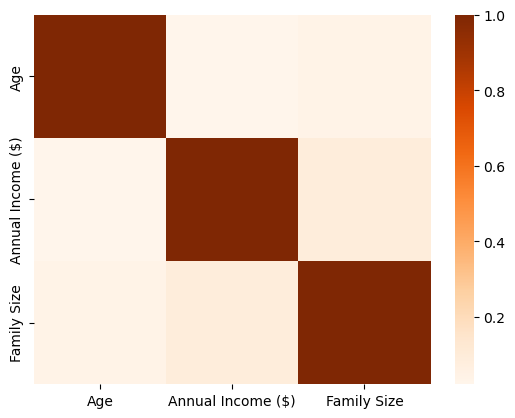

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 현재 feature간 상관관계 시각화
sns.heatmap(features.corr(), cmap='Oranges')

In [8]:
features.corr()

,Age,Annual Income ($),Family Size
Age,1.000000,0.021378,0.038254
Annual Income ($),0.021378,1.000000,0.093005
Family Size,0.038254,0.093005,1.000000


#### 1차 feature 연관성 시각화 결과
- feature 간 연관성 거의 없음

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 각 feature 별 VIF를 데이터프레임으로 만들어주는 함수
def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [10]:
get_vif(features)

,vif_score,feature
0,3.138295,Age
1,4.147080,Annual Income ($)
2,3.685121,Family Size


#### 1차 VIF 출력 결과
- VIF 점수 역시 이상이 발견되지 않음
- 범주형 데이터 추가 후 비교 분석

In [11]:
# 원본 데이터 세이트에서 범주형 데이터만 출력
c_df[['Gender', 'Profession']]

,Gender,Profession
0,Male,Healthcare
1,Male,Engineer
2,Female,Engineer
3,Female,Lawyer
4,Female,Entertainment
...,...,...
1995,Female,Artist
1996,Female,Doctor
1997,Male,Healthcare
1998,Male,Executive


In [12]:
# 필요한 컬럼만 추리기 - 범주형 데이터 추가
columns = ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size',
           'Gender', 'Profession', 'Spending Score (1-100)']

# 필요한 컬럼들만 추린 새로운 데이터 세트(전처리용) 생성
pre_c_df = c_df.loc[:, columns]

pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,Gender,Profession,Spending Score (1-100)
0,19,15000,1,4,Male,Healthcare,39
1,21,35000,3,3,Male,Engineer,81
2,20,86000,1,1,Female,Engineer,6
3,23,59000,0,2,Female,Lawyer,77
4,31,38000,2,6,Female,Entertainment,40
...,...,...,...,...,...,...,...
1995,71,184387,8,7,Female,Artist,40
1996,91,73158,7,7,Female,Doctor,32
1997,87,90961,9,2,Male,Healthcare,14
1998,77,182109,7,2,Male,Executive,4


In [13]:
# 데이터 세트 상태 확인
pre_c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     2000 non-null   int64 
 1   Annual Income ($)       2000 non-null   int64 
 2   Work Experience         2000 non-null   int64 
 3   Family Size             2000 non-null   int64 
 4   Gender                  2000 non-null   object
 5   Profession              1965 non-null   object
 6   Spending Score (1-100)  2000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 109.5+ KB


In [14]:
# Profession의 value_counts 출력
pre_c_df['Profession'].value_counts()

Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: count, dtype: int64

In [15]:
# Profession 데이터가 없는 것들만 출력
pre_c_df[pre_c_df['Profession'].isna()]

,Age,Annual Income ($),Work Experience,Family Size,Gender,Profession,Spending Score (1-100)
79,49,98000,1,1,Female,NaN,42
118,51,84000,2,7,Female,NaN,43
219,59,76000,9,1,Female,NaN,61
237,95,36000,0,4,Male,NaN,35
437,76,136259,0,7,Male,NaN,14
440,0,57373,0,7,Female,NaN,29
498,95,121725,12,3,Male,NaN,3
545,89,107359,10,6,Female,NaN,26
601,61,126370,11,4,Male,NaN,20
641,66,121377,7,7,Male,NaN,19


#### 중간 분석
- Profession에서 비어있는 값은 제거하지 않고 'No Profession'(백수)로 대체
- 그 외에도 나이가 10 이하인 회원이 다수 존재하지만, 분포가 많아 일단 제거하지 않음 

In [16]:
# 결측치 조정
pre_c_df['Profession'] = pre_c_df['Profession'].fillna('No Profession')

pre_c_df['Profession'].value_counts()

Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
No Profession     35
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

# 범주형 데이터에 레이블 인코딩 적용
columns = ['Gender', 'Profession']
label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(pre_c_df[column])
    label_encoders[column] = encoder.classes_
    pre_c_df[column] = result

label_encoders

{'Gender': array(['Female', 'Male'], dtype=object),
 'Profession': array(['Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive',
        'Healthcare', 'Homemaker', 'Lawyer', 'Marketing', 'No Profession'],
       dtype=object)}

In [18]:
pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,Gender,Profession,Spending Score (1-100)
0,19,15000,1,4,1,5,39
1,21,35000,3,3,1,2,81
2,20,86000,1,1,0,2,6
3,23,59000,0,2,0,7,77
4,31,38000,2,6,0,3,40
...,...,...,...,...,...,...,...
1995,71,184387,8,7,0,0,40
1996,91,73158,7,7,0,1,32
1997,87,90961,9,2,1,5,14
1998,77,182109,7,2,1,4,4


In [19]:
# 타겟과의 상관관계 출력
pre_c_df.corr()['Spending Score (1-100)'].sort_values(ascending=False)[1:]

Annual Income ($)    0.023299
Family Size          0.002232
Gender              -0.000528
Work Experience     -0.028948
Age                 -0.041798
Profession          -0.053433
Name: Spending Score (1-100), dtype: float64

<Axes: >

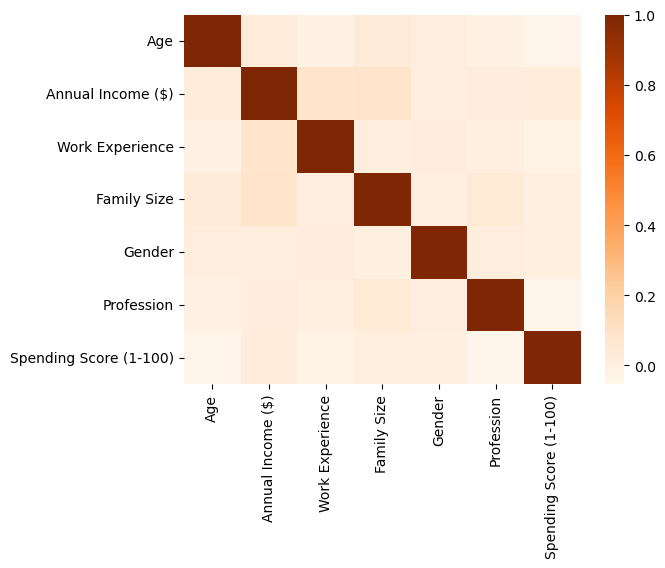

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 현재 feature간 상관관계 시각화
sns.heatmap(pre_c_df.iloc[:-1].corr(), cmap='Oranges')

#### 2차 연관성 시각화 결과
- 여전히 타겟과의 연관성과 feature들 간 연관성이 모두 약함

In [21]:
from statsmodels.api import OLS

# 데이터 분리
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

# 현재 데이터 세트의 OLS 평가 출력
model = OLS(targets, features)
print(model.fit().summary())

                                   OLS Regression Results                                  
Dep. Variable:     Spending Score (1-100)   R-squared (uncentered):                   0.713
Model:                                OLS   Adj. R-squared (uncentered):              0.712
Method:                     Least Squares   F-statistic:                              824.6
Date:                    Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                            08:38:04   Log-Likelihood:                         -9715.3
No. Observations:                    2000   AIC:                                  1.944e+04
Df Residuals:                        1994   BIC:                                  1.948e+04
Df Model:                               6                                                  
Covariance Type:                nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0

#### 2차 OLS 출력 결과
- VIF 출력 후 중요도가 낮은 feature가 있다면 제거

In [22]:
# VIF 점수 재출력
get_vif(features)

,vif_score,feature
0,3.247680,Age
1,4.853215,Annual Income ($)
2,2.010999,Work Experience
3,3.912348,Family Size
4,1.617296,Gender
5,2.078842,Profession


#### 2차 VIF 출력 결과
- VIF 점수 또한 여전히 이상이 발견되지 않음
- 따라서 이대로 선형 회귀 모델 학습 진행

#### W, b를 직접 초기화하여 학습

In [23]:
import numpy as np
import torch
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

# feature 개수에 맞춤
W = torch.zeros((6, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = SGD([W, b], lr=1e-11)

epochs = 300000

for epoch in range(1, epochs + 1):
    H = X_train.matmul(W) + b
    loss = torch.mean((y_train - H) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, W4: {:.4f}, W5: {:.4f}, W6: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W[0].item(), W[1].item(), W[2].item(), \
                      W[3].item(), W[4].item(), W[5].item(), b.item(), loss.item()))

1000/300000: W1: 0.0000, W2: 0.0004, W3: 0.0000, W4: 0.0000, W5: 0.0000, W6: 0.0000, b: 0.0000, loss: 1142.4907
2000/300000: W1: 0.0000, W2: 0.0004, W3: 0.0000, W4: 0.0000, W5: 0.0000, W6: 0.0000, b: 0.0000, loss: 1142.4872
3000/300000: W1: 0.0000, W2: 0.0004, W3: 0.0000, W4: 0.0000, W5: 0.0000, W6: 0.0000, b: 0.0000, loss: 1142.4836
4000/300000: W1: 0.0000, W2: 0.0004, W3: 0.0000, W4: 0.0000, W5: 0.0000, W6: 0.0000, b: 0.0000, loss: 1142.4801
5000/300000: W1: 0.0000, W2: 0.0004, W3: 0.0000, W4: 0.0000, W5: 0.0000, W6: 0.0000, b: 0.0000, loss: 1142.4764
6000/300000: W1: 0.0000, W2: 0.0004, W3: 0.0000, W4: 0.0000, W5: 0.0000, W6: 0.0000, b: 0.0000, loss: 1142.4730
7000/300000: W1: 0.0000, W2: 0.0004, W3: 0.0000, W4: 0.0000, W5: 0.0000, W6: 0.0000, b: 0.0000, loss: 1142.4695
8000/300000: W1: 0.0000, W2: 0.0004, W3: 0.0000, W4: 0.0000, W5: 0.0000, W6: 0.0000, b: 0.0000, loss: 1142.4659
9000/300000: W1: 0.0001, W2: 0.0004, W3: 0.0000, W4: 0.0000, W5: 0.0000, W6: 0.0000, b: 0.0000, loss: 11

In [24]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

# 선형 회귀 모델의 평가 지표(R2 점수 포함)를 출력해주는 함수
def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

#### 선형 회귀 함수를 직접 만들어서 학습 + Mini Batch

In [25]:
from torch.nn import Linear, Module

class LinearRegressionModel(Module):
    def __init__(self, input):
        super().__init__()
        self.linear = Linear(input, 1)

    def forward(self, x):
        return self.linear(x)

In [26]:
from sklearn.model_selection import train_test_split
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from torch.utils.data import TensorDataset, DataLoader

torch.manual_seed(124)

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

td = TensorDataset(X_train, y_train)
dl = DataLoader(td, batch_size=100, shuffle=True)

l_r = LinearRegressionModel(6)

optimizer = SGD(l_r.parameters(), lr=1e-11)

epochs = 10000

for epoch in range(1, epochs + 1):
    for i, samples in enumerate(dl):
        
        X_train, y_train = samples

        H = l_r(X_train)
        loss = mse_loss(H, y_train)
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f'Epoch: {epoch}/{epochs}, Batch: {i + 1}/{len(dl)}, ', end='')
            for i, w in enumerate(list(l_r.parameters())[0][0]):
                print(f'W{i + 1}: {np.round(w.item(), 4)}, ', end='')
            print(f'b: {np.round(list(l_r.parameters())[1].item(), 4)}')
            print(f'loss: {np.round(loss.item(), 4)}')

Epoch: 100/10000, Batch: 1/16, W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.01, W6: -0.3078, b: -0.1553
loss: 1670.7501
Epoch: 100/10000, Batch: 2/16, W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.01, W6: -0.3078, b: -0.1553
loss: 1273.5995
Epoch: 100/10000, Batch: 3/16, W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.01, W6: -0.3078, b: -0.1553
loss: 1988.751
Epoch: 100/10000, Batch: 4/16, W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.01, W6: -0.3078, b: -0.1553
loss: 1572.1277
Epoch: 100/10000, Batch: 5/16, W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.01, W6: -0.3078, b: -0.1553
loss: 1305.0232
Epoch: 100/10000, Batch: 6/16, W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.01, W6: -0.3078, b: -0.1553
loss: 1177.5366
Epoch: 100/10000, Batch: 7/16, W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5: 0.01, W6: -0.3078, b: -0.1553
loss: 1164.1774
Epoch: 100/10000, Batch: 8/16, W1: -0.2837, W2: 0.0005, W3: 0.2782, W4: -0.0211, W5:

#### Sklearn의 선형 회귀 모델로 학습

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [28]:
# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 778.3220, RMSE: 27.8984, MSLE: 0.7092, RMSLE: 0.8421, R2: -0.0046


#### 학습 결과
- 오차와 R2가 비정상적인 수치를 보임
- Profession 이상치 제거 및 원핫 인코딩 후 다시 학습
- Age가 10 이하, Family Size가 8 이상인 데이터도 제거

In [29]:
# 필요한 컬럼만 추리기 - 범주형 데이터 추가
columns = ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size',
           'Gender', 'Profession', 'Spending Score (1-100)']

# 필요한 컬럼들만 추린 새로운 데이터 세트(전처리용) 생성
pre_c_df = c_df.loc[:, columns]

pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,Gender,Profession,Spending Score (1-100)
0,19,15000,1,4,Male,Healthcare,39
1,21,35000,3,3,Male,Engineer,81
2,20,86000,1,1,Female,Engineer,6
3,23,59000,0,2,Female,Lawyer,77
4,31,38000,2,6,Female,Entertainment,40
...,...,...,...,...,...,...,...
1995,71,184387,8,7,Female,Artist,40
1996,91,73158,7,7,Female,Doctor,32
1997,87,90961,9,2,Male,Healthcare,14
1998,77,182109,7,2,Male,Executive,4


In [30]:
# 결측치 및 이상치 제거
pre_c_df = pre_c_df[~ pre_c_df['Profession'].isna()]
pre_c_df = pre_c_df[pre_c_df['Age'] > 10]
pre_c_df = pre_c_df[pre_c_df['Family Size'] <= 7]

pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,Gender,Profession,Spending Score (1-100)
0,19,15000,1,4,Male,Healthcare,39
1,21,35000,3,3,Male,Engineer,81
2,20,86000,1,1,Female,Engineer,6
3,23,59000,0,2,Female,Lawyer,77
4,31,38000,2,6,Female,Entertainment,40
...,...,...,...,...,...,...,...
1995,71,184387,8,7,Female,Artist,40
1996,91,73158,7,7,Female,Doctor,32
1997,87,90961,9,2,Male,Healthcare,14
1998,77,182109,7,2,Male,Executive,4


In [31]:
# 인덱스 초기화
pre_c_df = pre_c_df.reset_index(drop=True)

pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,Gender,Profession,Spending Score (1-100)
0,19,15000,1,4,Male,Healthcare,39
1,21,35000,3,3,Male,Engineer,81
2,20,86000,1,1,Female,Engineer,6
3,23,59000,0,2,Female,Lawyer,77
4,31,38000,2,6,Female,Entertainment,40
...,...,...,...,...,...,...,...
1763,71,184387,8,7,Female,Artist,40
1764,91,73158,7,7,Female,Doctor,32
1765,87,90961,9,2,Male,Healthcare,14
1766,77,182109,7,2,Male,Executive,4


In [32]:
# 현재 데이터 세트 상태 확인
pre_c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     1768 non-null   int64 
 1   Annual Income ($)       1768 non-null   int64 
 2   Work Experience         1768 non-null   int64 
 3   Family Size             1768 non-null   int64 
 4   Gender                  1768 non-null   object
 5   Profession              1768 non-null   object
 6   Spending Score (1-100)  1768 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 96.8+ KB


In [33]:
pre_c_df.Profession.value_counts()

Profession
Artist           552
Healthcare       310
Entertainment    210
Engineer         167
Executive        138
Doctor           136
Lawyer           125
Marketing         77
Homemaker         53
Name: count, dtype: int64

In [34]:
pre_c_df['Family Size'].value_counts()

Family Size
2    326
3    274
4    268
1    256
5    228
6    215
7    201
Name: count, dtype: int64

In [35]:
pre_c_df.Age.value_counts()

Age
31    31
32    30
52    29
54    28
91    28
      ..
77    12
71    12
61    11
42    11
98     9
Name: count, Length: 89, dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder

# Gender에 레이블 인코딩 적용
label_encoder = LabelEncoder()
result = label_encoder.fit_transform(pre_c_df['Gender'])
print(result)
print(label_encoder.classes_)
pre_c_df['Gender'] = result

[1 1 0 ... 1 1 1]
['Female' 'Male']


In [37]:
pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,Gender,Profession,Spending Score (1-100)
0,19,15000,1,4,1,Healthcare,39
1,21,35000,3,3,1,Engineer,81
2,20,86000,1,1,0,Engineer,6
3,23,59000,0,2,0,Lawyer,77
4,31,38000,2,6,0,Entertainment,40
...,...,...,...,...,...,...,...
1763,71,184387,8,7,0,Artist,40
1764,91,73158,7,7,0,Doctor,32
1765,87,90961,9,2,1,Healthcare,14
1766,77,182109,7,2,1,Executive,4


In [38]:
# Profession에 원핫 인코딩 적용
from sklearn.preprocessing import OneHotEncoder
import numpy as np

one_hot_encoder = OneHotEncoder(sparse_output=False)

result = one_hot_encoder.fit_transform(pre_c_df[['Profession']])

one_hot_encoder.categories_

[array(['Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive',
        'Healthcare', 'Homemaker', 'Lawyer', 'Marketing'], dtype=object)]

In [39]:
pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,Gender,Profession,Spending Score (1-100)
0,19,15000,1,4,1,Healthcare,39
1,21,35000,3,3,1,Engineer,81
2,20,86000,1,1,0,Engineer,6
3,23,59000,0,2,0,Lawyer,77
4,31,38000,2,6,0,Entertainment,40
...,...,...,...,...,...,...,...
1763,71,184387,8,7,0,Artist,40
1764,91,73158,7,7,0,Doctor,32
1765,87,90961,9,2,1,Healthcare,14
1766,77,182109,7,2,1,Executive,4


In [40]:
# 원핫 인코딩 된 데이터를 원볻 데이터 프레임에 병합
pre_c_df = pd.concat([pre_c_df,
                     pd.DataFrame(result, columns=one_hot_encoder.categories_).astype(np.int8)],
                     axis=1)

pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,Gender,Profession,Spending Score (1-100),"(Artist,)","(Doctor,)","(Engineer,)","(Entertainment,)","(Executive,)","(Healthcare,)","(Homemaker,)","(Lawyer,)","(Marketing,)"
0,19,15000,1,4,1,Healthcare,39,0,0,0,0,0,1,0,0,0
1,21,35000,3,3,1,Engineer,81,0,0,1,0,0,0,0,0,0
2,20,86000,1,1,0,Engineer,6,0,0,1,0,0,0,0,0,0
3,23,59000,0,2,0,Lawyer,77,0,0,0,0,0,0,0,1,0
4,31,38000,2,6,0,Entertainment,40,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,71,184387,8,7,0,Artist,40,1,0,0,0,0,0,0,0,0
1764,91,73158,7,7,0,Doctor,32,0,1,0,0,0,0,0,0,0
1765,87,90961,9,2,1,Healthcare,14,0,0,0,0,0,1,0,0,0
1766,77,182109,7,2,1,Executive,4,0,0,0,0,1,0,0,0,0


In [41]:
# profession 컬럼 제거
pre_c_df = pre_c_df.drop(labels=['Profession'], axis=1)

pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,Gender,Spending Score (1-100),"(Artist,)","(Doctor,)","(Engineer,)","(Entertainment,)","(Executive,)","(Healthcare,)","(Homemaker,)","(Lawyer,)","(Marketing,)"
0,19,15000,1,4,1,39,0,0,0,0,0,1,0,0,0
1,21,35000,3,3,1,81,0,0,1,0,0,0,0,0,0
2,20,86000,1,1,0,6,0,0,1,0,0,0,0,0,0
3,23,59000,0,2,0,77,0,0,0,0,0,0,0,1,0
4,31,38000,2,6,0,40,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,71,184387,8,7,0,40,1,0,0,0,0,0,0,0,0
1764,91,73158,7,7,0,32,0,1,0,0,0,0,0,0,0
1765,87,90961,9,2,1,14,0,0,0,0,0,1,0,0,0
1766,77,182109,7,2,1,4,0,0,0,0,1,0,0,0,0


In [42]:
#  컬럼 명 변경
pre_c_df.columns = ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size',
                    'Gender', 'Spending Score (1-100)', 'Artist', 'Doctor', 'Engineer',
                    'Entertainment', 'Executive', 'Healthcare', 'Homemaker', 'Lawyer', 'Marketing']

pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,Gender,Spending Score (1-100),Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,19,15000,1,4,1,39,0,0,0,0,0,1,0,0,0
1,21,35000,3,3,1,81,0,0,1,0,0,0,0,0,0
2,20,86000,1,1,0,6,0,0,1,0,0,0,0,0,0
3,23,59000,0,2,0,77,0,0,0,0,0,0,0,1,0
4,31,38000,2,6,0,40,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,71,184387,8,7,0,40,1,0,0,0,0,0,0,0,0
1764,91,73158,7,7,0,32,0,1,0,0,0,0,0,0,0
1765,87,90961,9,2,1,14,0,0,0,0,0,1,0,0,0
1766,77,182109,7,2,1,4,0,0,0,0,1,0,0,0,0


In [43]:
# 컬럼 순서 재배치
columns = ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size',
           'Gender', 'Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive',
           'Healthcare', 'Homemaker', 'Lawyer', 'Marketing', 'Spending Score (1-100)']

pre_c_df = pre_c_df.loc[:, columns]

pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,Gender,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Spending Score (1-100)
0,19,15000,1,4,1,0,0,0,0,0,1,0,0,0,39
1,21,35000,3,3,1,0,0,1,0,0,0,0,0,0,81
2,20,86000,1,1,0,0,0,1,0,0,0,0,0,0,6
3,23,59000,0,2,0,0,0,0,0,0,0,0,1,0,77
4,31,38000,2,6,0,0,0,0,1,0,0,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,71,184387,8,7,0,1,0,0,0,0,0,0,0,0,40
1764,91,73158,7,7,0,0,1,0,0,0,0,0,0,0,32
1765,87,90961,9,2,1,0,0,0,0,0,1,0,0,0,14
1766,77,182109,7,2,1,0,0,0,0,1,0,0,0,0,4


In [44]:
# 타겟과의 상관관계 출력
pre_c_df.corr()['Spending Score (1-100)'].sort_values(ascending=False)[1:]

Artist               0.054091
Annual Income ($)    0.027223
Entertainment        0.014666
Family Size          0.004634
Gender               0.000396
Executive           -0.004529
Doctor              -0.011226
Marketing           -0.013761
Healthcare          -0.015382
Age                 -0.017822
Engineer            -0.019140
Work Experience     -0.021961
Lawyer              -0.025936
Homemaker           -0.027565
Name: Spending Score (1-100), dtype: float64

<Axes: >

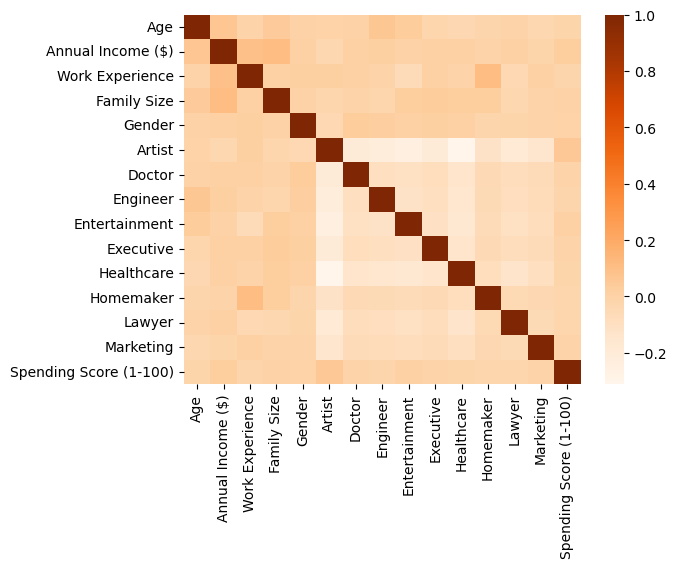

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# 현재 feature간 상관관계 시각화
sns.heatmap(pre_c_df.iloc[:-1].corr(), cmap='Oranges')

In [46]:
pre_c_df.iloc[:-1].corr()

,Age,Annual Income ($),Work Experience,Family Size,Gender,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Spending Score (1-100)
Age,1.000000,0.064895,-0.011553,0.041742,0.002179,0.000314,0.006236,0.061937,0.037069,-0.028457,-0.035673,-0.020799,-0.004176,-0.029759,-0.017870
Annual Income ($),0.064895,1.000000,0.094036,0.109985,0.008507,-0.033908,0.009541,0.019521,0.001823,0.016076,0.013860,-0.009262,0.006966,-0.014295,0.027223
Work Experience,-0.011553,0.094036,1.000000,0.015460,0.018539,0.020166,0.012099,-0.010334,-0.062192,0.011941,-0.004222,0.110387,-0.044503,0.007443,-0.021967
Family Size,0.041742,0.109985,0.015460,1.000000,0.005722,-0.027879,-0.008554,-0.028145,0.030648,0.033284,0.029573,0.027200,-0.033527,-0.013153,0.004659
Gender,0.002179,0.008507,0.018539,0.005722,1.000000,-0.043960,0.034132,0.024946,0.008252,0.021831,0.013293,-0.023491,-0.016414,-0.006781,0.000364
Artist,0.000314,-0.033908,0.020166,-0.027879,-0.043960,1.000000,-0.194636,-0.217761,-0.246871,-0.196183,-0.310908,-0.118526,-0.185973,-0.143874,0.054115
Doctor,0.006236,0.009541,0.012099,-0.008554,0.034132,-0.194636,1.000000,-0.093291,-0.105763,-0.084047,-0.133197,-0.050778,-0.079673,-0.061637,-0.011218
Engineer,0.061937,0.019521,-0.010334,-0.028145,0.024946,-0.217761,-0.093291,1.000000,-0.118328,-0.094032,-0.149022,-0.056811,-0.089139,-0.068960,-0.019132
Entertainment,0.037069,0.001823,-0.062192,0.030648,0.008252,-0.246871,-0.105763,-0.118328,1.000000,-0.106603,-0.168943,-0.064405,-0.101055,-0.078179,0.014624
Executive,-0.028457,0.016076,0.011941,0.033284,0.021831,-0.196183,-0.084047,-0.094032,-0.106603,1.000000,-0.134255,-0.051181,-0.080306,-0.062127,-0.004522


#### 3차 연관성 시각화 결과
- 여전히 타겟과, feature 간의 상관관계는 거의 없음

In [47]:
from statsmodels.api import OLS

# 데이터 분리
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

# 현재 데이터 세트의 OLS 평가 출력
model = OLS(targets, features)
print(model.fit().summary())

                              OLS Regression Results                              
Dep. Variable:     Spending Score (1-100)   R-squared:                       0.006
Model:                                OLS   Adj. R-squared:                 -0.001
Method:                     Least Squares   F-statistic:                    0.8461
Date:                    Mon, 29 Apr 2024   Prob (F-statistic):              0.611
Time:                            08:41:56   Log-Likelihood:                -8388.0
No. Observations:                    1768   AIC:                         1.680e+04
Df Residuals:                        1754   BIC:                         1.688e+04
Df Model:                              13                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

#### 3차 OLS 출력 결과
- 원핫 인코딩 후 R2와 p-value에 심각한 이상 발생
- 모델 평가 후 2번째 사이클과 비교하여 더 나은 결과를 보여준 모델 사용

In [48]:
# VIF 점수 재출력
get_vif(features)

,vif_score,feature
0,1.013743,Age
1,1.027412,Annual Income ($)
2,1.028319,Work Experience
3,1.019420,Family Size
4,1.004992,Gender
5,5.081300,Artist
6,2.064801,Doctor
7,2.347744,Engineer
8,2.656846,Entertainment
9,2.083895,Executive


#### 3차 VIF 출력 결과
- Artist에서 5점 이상을 보임에 따라 해당 컬럼 제거 후 연관성과 OLS 재출력

In [49]:
pre_c_df = pre_c_df.drop(labels=['Artist'], axis=1)

pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,Gender,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Spending Score (1-100)
0,19,15000,1,4,1,0,0,0,0,1,0,0,0,39
1,21,35000,3,3,1,0,1,0,0,0,0,0,0,81
2,20,86000,1,1,0,0,1,0,0,0,0,0,0,6
3,23,59000,0,2,0,0,0,0,0,0,0,1,0,77
4,31,38000,2,6,0,0,0,1,0,0,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,71,184387,8,7,0,0,0,0,0,0,0,0,0,40
1764,91,73158,7,7,0,1,0,0,0,0,0,0,0,32
1765,87,90961,9,2,1,0,0,0,0,1,0,0,0,14
1766,77,182109,7,2,1,0,0,0,1,0,0,0,0,4


In [50]:
# 타겟과의 상관관계 출력
pre_c_df.corr()['Spending Score (1-100)'].sort_values(ascending=False)[1:]

Annual Income ($)    0.027223
Entertainment        0.014666
Family Size          0.004634
Gender               0.000396
Executive           -0.004529
Doctor              -0.011226
Marketing           -0.013761
Healthcare          -0.015382
Age                 -0.017822
Engineer            -0.019140
Work Experience     -0.021961
Lawyer              -0.025936
Homemaker           -0.027565
Name: Spending Score (1-100), dtype: float64

<Axes: >

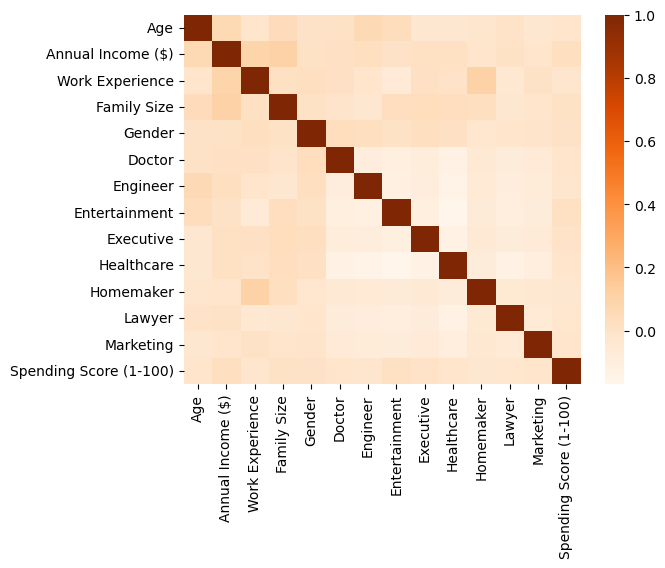

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# 현재 feature간 상관관계 시각화
sns.heatmap(pre_c_df.iloc[:-1].corr(), cmap='Oranges')

In [52]:
from statsmodels.api import OLS

# 데이터 분리
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

# 현재 데이터 세트의 OLS 평가 출력
model = OLS(targets, features)
print(model.fit().summary())

                                   OLS Regression Results                                  
Dep. Variable:     Spending Score (1-100)   R-squared (uncentered):                   0.718
Model:                                OLS   Adj. R-squared (uncentered):              0.716
Method:                     Least Squares   F-statistic:                              344.1
Date:                    Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                            08:41:56   Log-Likelihood:                         -8563.7
No. Observations:                    1768   AIC:                                  1.715e+04
Df Residuals:                        1755   BIC:                                  1.722e+04
Df Model:                              13                                                  
Covariance Type:                nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0

#### 4차 OLS 출력 결과
- R2와 p-value가 정상 범주로 돌아옴

In [53]:
# VIF 점수 재출력
get_vif(features)

,vif_score,feature
0,4.252517,Age
1,5.287891,Annual Income ($)
2,2.043718,Work Experience
3,4.091371,Family Size
4,1.636462,Gender
5,1.211446,Doctor
6,1.269223,Engineer
7,1.332323,Entertainment
8,1.216656,Executive
9,1.471091,Healthcare


#### 4차 VIF 출력 결과
- 연 수입에서 VIF 점수 이상 발생

In [54]:
pre_c_df = pre_c_df.drop(labels=['Annual Income ($)'], axis=1)

pre_c_df

,Age,Work Experience,Family Size,Gender,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Spending Score (1-100)
0,19,1,4,1,0,0,0,0,1,0,0,0,39
1,21,3,3,1,0,1,0,0,0,0,0,0,81
2,20,1,1,0,0,1,0,0,0,0,0,0,6
3,23,0,2,0,0,0,0,0,0,0,1,0,77
4,31,2,6,0,0,0,1,0,0,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,71,8,7,0,0,0,0,0,0,0,0,0,40
1764,91,7,7,0,1,0,0,0,0,0,0,0,32
1765,87,9,2,1,0,0,0,0,1,0,0,0,14
1766,77,7,2,1,0,0,0,1,0,0,0,0,4


In [55]:
# 타겟과의 상관관계 출력
pre_c_df.corr()['Spending Score (1-100)'].sort_values(ascending=False)[1:]

Entertainment      0.014666
Family Size        0.004634
Gender             0.000396
Executive         -0.004529
Doctor            -0.011226
Marketing         -0.013761
Healthcare        -0.015382
Age               -0.017822
Engineer          -0.019140
Work Experience   -0.021961
Lawyer            -0.025936
Homemaker         -0.027565
Name: Spending Score (1-100), dtype: float64

<Axes: >

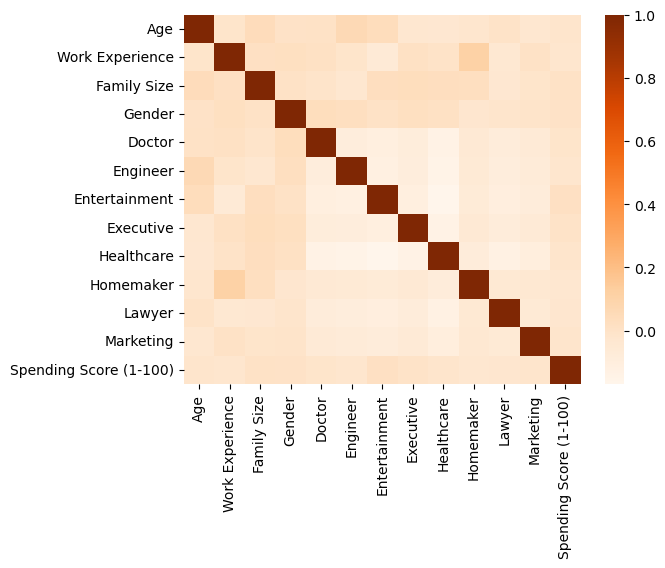

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# 현재 feature간 상관관계 시각화
sns.heatmap(pre_c_df.iloc[:-1].corr(), cmap='Oranges')

In [57]:
from statsmodels.api import OLS

# 데이터 분리
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

# 현재 데이터 세트의 OLS 평가 출력
model = OLS(targets, features)
print(model.fit().summary())

                                   OLS Regression Results                                  
Dep. Variable:     Spending Score (1-100)   R-squared (uncentered):                   0.699
Model:                                OLS   Adj. R-squared (uncentered):              0.697
Method:                     Least Squares   F-statistic:                              339.5
Date:                    Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                            08:41:56   Log-Likelihood:                         -8622.6
No. Observations:                    1768   AIC:                                  1.727e+04
Df Residuals:                        1756   BIC:                                  1.733e+04
Df Model:                              12                                                  
Covariance Type:                nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.9

#### 5차 OLS 출력 결과
- Homemaker는 추후 제거 우선순위로 취급

In [58]:
# VIF 점수 재출력
get_vif(features)

,vif_score,feature
0,3.670344,Age
1,1.934723,Work Experience
2,3.558206,Family Size
3,1.619272,Gender
4,1.194332,Doctor
5,1.247401,Engineer
6,1.309410,Entertainment
7,1.198156,Executive
8,1.428872,Healthcare
9,1.093693,Homemaker


#### 5차 VIF 출력 결과
- 점수에 이상이 있는 feature가 없어짐에 따라 Sklearn으로 학습 진행

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [60]:
# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 770.5974, RMSE: 27.7596, MSLE: 0.6752, RMSLE: 0.8217, R2: 0.0046


#### 학습 결과
- R2 점수가 매우 낮음
- 데이터 세트 비중을 올려서 다시 학습

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.23, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [62]:
# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 758.9882, RMSE: 27.5497, MSLE: 0.6873, RMSLE: 0.8290, R2: 0.0075


#### 학습 결과
- 위보다 더 나은 학습 결과를 얻을 수 없었음에 따라 학습 종료

In [63]:
from sklearn.preprocessing import PowerTransformer

# box-cox: 양수만 가능(0, 음수 불가)
# yeo-johnson: 0, 음수도 가능, default

# standardize: 표준화 사용 여부. 보통은 하지 않음
ptf = PowerTransformer(standardize=True)
result = ptf.fit_transform(pre_c_df[['Spending Score (1-100)']])
pre_c_df['Target-yeo'] = result
pre_c_df

,Age,Work Experience,Family Size,Gender,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Spending Score (1-100),Target-yeo
0,19,1,4,1,0,0,0,0,1,0,0,0,39,-0.335168
1,21,3,3,1,0,1,0,0,0,0,0,0,81,1.055585
2,20,1,1,0,0,1,0,0,0,0,0,0,6,-1.762226
3,23,0,2,0,0,0,0,0,0,0,1,0,77,0.932718
4,31,2,6,0,0,0,1,0,0,0,0,0,40,-0.298677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,71,8,7,0,0,0,0,0,0,0,0,0,40,-0.298677
1764,91,7,7,0,1,0,0,0,0,0,0,0,32,-0.597540
1765,87,9,2,1,0,0,0,0,1,0,0,0,14,-1.353246
1766,77,7,2,1,0,0,0,1,0,0,0,0,4,-1.880727


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Work Experience'}>,
        <Axes: title={'center': 'Family Size'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Doctor'}>,
        <Axes: title={'center': 'Engineer'}>,
        <Axes: title={'center': 'Entertainment'}>,
        <Axes: title={'center': 'Executive'}>],
       [<Axes: title={'center': 'Healthcare'}>,
        <Axes: title={'center': 'Homemaker'}>,
        <Axes: title={'center': 'Lawyer'}>,
        <Axes: title={'center': 'Marketing'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>,
        <Axes: title={'center': 'Target-yeo'}>, <Axes: >, <Axes: >]],
      dtype=object)

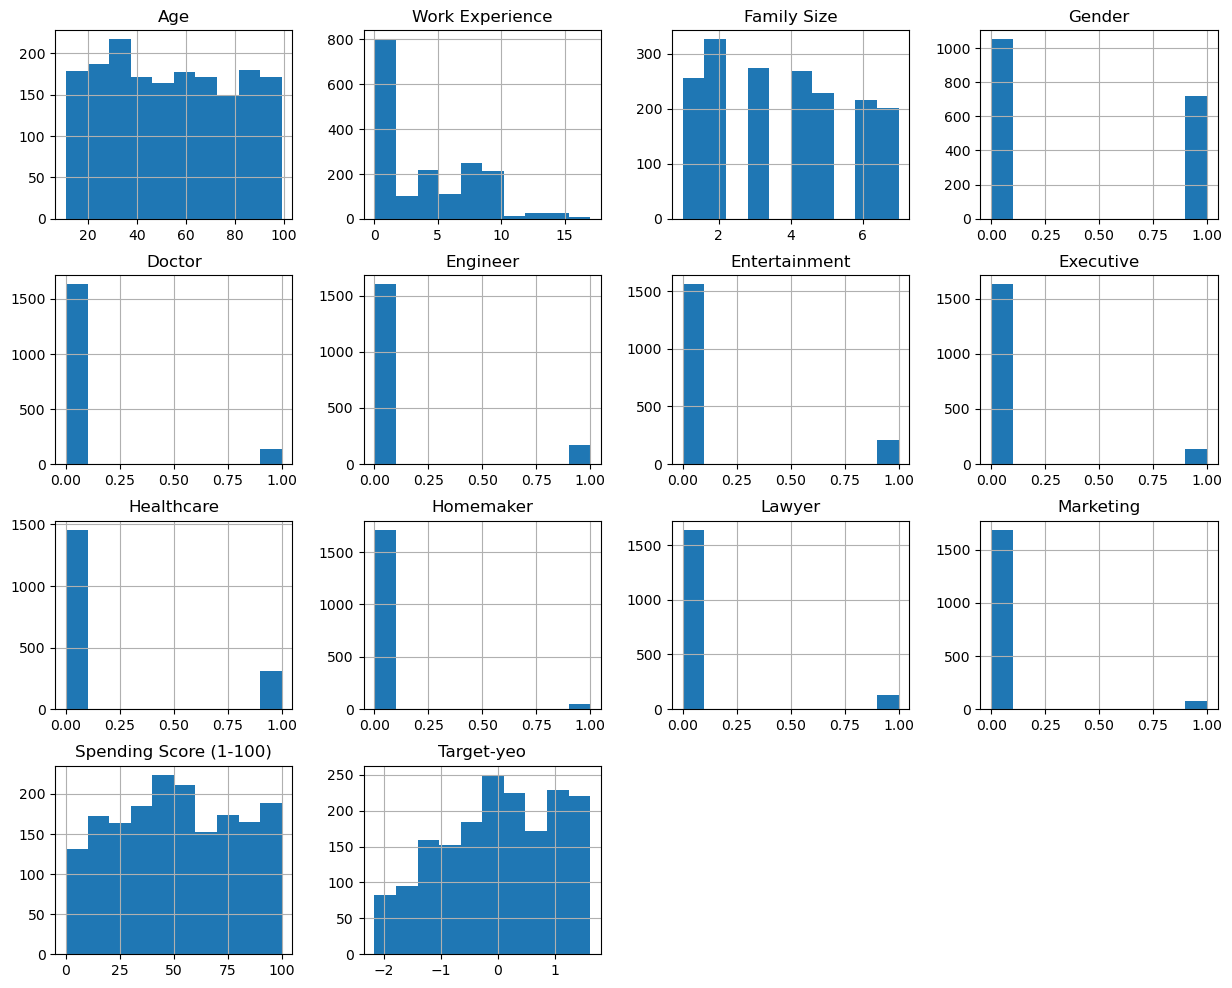

In [66]:
pre_c_df.hist(figsize=(15, 12))

In [67]:
pre_c_df = pre_c_df.drop(labels=['Spending Score (1-100)'], axis=1)
pre_c_df

,Age,Work Experience,Family Size,Gender,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Target-yeo
0,19,1,4,1,0,0,0,0,1,0,0,0,-0.335168
1,21,3,3,1,0,1,0,0,0,0,0,0,1.055585
2,20,1,1,0,0,1,0,0,0,0,0,0,-1.762226
3,23,0,2,0,0,0,0,0,0,0,1,0,0.932718
4,31,2,6,0,0,0,1,0,0,0,0,0,-0.298677
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,71,8,7,0,0,0,0,0,0,0,0,0,-0.298677
1764,91,7,7,0,1,0,0,0,0,0,0,0,-0.597540
1765,87,9,2,1,0,0,0,0,1,0,0,0,-1.353246
1766,77,7,2,1,0,0,0,1,0,0,0,0,-1.880727


In [68]:
from statsmodels.api import OLS

# 데이터 분리
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

# 현재 데이터 세트의 OLS 평가 출력
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Target-yeo   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.003
Method:                 Least Squares   F-statistic:                             0.5948
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                       0.848
Time:                        09:30:47   Log-Likelihood:                         -2505.1
No. Observations:                1768   AIC:                                      5034.
Df Residuals:                    1756   BIC:                                      5100.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [69]:
pre_c_df = pre_c_df.drop(labels=['Work Experience'], axis=1)
pre_c_df

,Age,Family Size,Gender,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Target-yeo
0,19,4,1,0,0,0,0,1,0,0,0,-0.335168
1,21,3,1,0,1,0,0,0,0,0,0,1.055585
2,20,1,0,0,1,0,0,0,0,0,0,-1.762226
3,23,2,0,0,0,0,0,0,0,1,0,0.932718
4,31,6,0,0,0,1,0,0,0,0,0,-0.298677
...,...,...,...,...,...,...,...,...,...,...,...,...
1763,71,7,0,0,0,0,0,0,0,0,0,-0.298677
1764,91,7,0,1,0,0,0,0,0,0,0,-0.597540
1765,87,2,1,0,0,0,0,1,0,0,0,-1.353246
1766,77,2,1,0,0,0,1,0,0,0,0,-1.880727


In [70]:
from statsmodels.api import OLS

# 데이터 분리
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

# 현재 데이터 세트의 OLS 평가 출력
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Target-yeo   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                             0.6329
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                       0.802
Time:                        09:32:16   Log-Likelihood:                         -2505.2
No. Observations:                1768   AIC:                                      5032.
Df Residuals:                    1757   BIC:                                      5093.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [71]:
# 필요한 컬럼만 추리기
columns = ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size', 'Spending Score (1-100)']

# 필요한 컬럼들만 추린 새로운 데이터 세트(전처리용) 생성
pre_c_df = c_df.loc[:, columns]

pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,Spending Score (1-100)
0,19,15000,1,4,39
1,21,35000,3,3,81
2,20,86000,1,1,6
3,23,59000,0,2,77
4,31,38000,2,6,40
...,...,...,...,...,...
1995,71,184387,8,7,40
1996,91,73158,7,7,32
1997,87,90961,9,2,14
1998,77,182109,7,2,4


In [72]:
from sklearn.preprocessing import PowerTransformer

# box-cox: 양수만 가능(0, 음수 불가)
# yeo-johnson: 0, 음수도 가능, default

# standardize: 표준화 사용 여부. 보통은 하지 않음
ptf = PowerTransformer(standardize=False)
result = ptf.fit_transform(pre_c_df[['Spending Score (1-100)']])
pre_c_df['Target-yeo'] = result
pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,Spending Score (1-100),Target-yeo
0,19,15000,1,4,39,20.233691
1,21,35000,3,3,81,35.790245
2,20,86000,1,1,6,4.441314
3,23,59000,0,2,77,34.411750
4,31,38000,2,6,40,20.640329
...,...,...,...,...,...,...
1995,71,184387,8,7,40,20.640329
1996,91,73158,7,7,32,17.313011
1997,87,90961,9,2,14,8.938535
1998,77,182109,7,2,4,3.145736


In [73]:
pre_c_df = pre_c_df.drop(labels=['Spending Score (1-100)'], axis=1)
pre_c_df

,Age,Annual Income ($),Work Experience,Family Size,Target-yeo
0,19,15000,1,4,20.233691
1,21,35000,3,3,35.790245
2,20,86000,1,1,4.441314
3,23,59000,0,2,34.411750
4,31,38000,2,6,20.640329
...,...,...,...,...,...
1995,71,184387,8,7,20.640329
1996,91,73158,7,7,17.313011
1997,87,90961,9,2,8.938535
1998,77,182109,7,2,3.145736


In [74]:
from statsmodels.api import OLS

# 데이터 분리
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

# 현재 데이터 세트의 OLS 평가 출력
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Target-yeo   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              1575.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        09:35:06   Log-Likelihood:                         -7972.4
No. Observations:                2000   AIC:                                  1.595e+04
Df Residuals:                    1996   BIC:                                  1.598e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [75]:
get_vif(features)

,vif_score,feature
0,3.172253,Age
1,4.533660,Annual Income ($)
2,1.993979,Work Experience
3,3.746431,Family Size


In [77]:
(pre_c_df['Target-yeo'] <= 0).sum()

2